In [7]:
import os 
import glob
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread,imsave
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import save_model, load_model, Model
from tensorflow.keras.layers import Input,InputLayer, Dropout, Flatten, Dense, Activation, MaxPooling2D, Conv2D
from sklearn.metrics import classification_report

In [1]:
root='/blue/oguzhan/swetha.lenkala/AFFINE_REG_SKS_MASK_2D_IMAGES_DIR'

In [2]:
import tensorflow as tf
image_Shape=(436,364,3)

def inceptionv3_row(optimizer, loss, metrics, shape):
    image_input = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_shape=shape)

    for layer in image_input.layers:
        layer.trainable = True
        layer._name = layer._name + str('_img')

    x = Flatten()(image_input.output)
    x = Dropout(0.4)(x)
    x = Dense(512)(x)
    x = Dense(256)(x)
    x = Dense(128)(x)
    output_layer = Dense(3, activation='softmax')(x)

    model = Model(inputs=image_input.input, outputs=output_layer)
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model

In [3]:
def plot_confusion_matrix(true_lab,predict_lab,classes,path):
  matrix_confusion = tf.math.confusion_matrix(labels=true_lab, predictions=predicted_lab, num_classes=len(classes))
  ax = plt.subplot()
  sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(classes)
  ax.yaxis.set_ticklabels(classes)
  plt.savefig(f'{path}confusion_matrix.png')

In [4]:
def dump_text(text,path):
  text_file = open(path, "w")
  text_file.write(text)
  text_file.close()
     

In [5]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

2024-04-13 15:46:30.920386: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-13 15:46:33.345346: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9629 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:60:00.0, compute capability: 7.5


In [8]:
training_image_datagen = ImageDataGenerator(horizontal_flip=True).flow_from_directory(
                                                  directory=f'{root}/training/',
                                                  target_size=(image_Shape[0], image_Shape[1]),
                                                  class_mode='categorical',
                                                  batch_size=4
                                                  )

testing_image_datagen = ImageDataGenerator().flow_from_directory(
                                                  directory = f'{root}/testing/' ,
                                                  target_size = (image_Shape[0] ,image_Shape[1]) ,
                                                  class_mode = 'categorical' ,
                                                  batch_size=1 ,
                                                  shuffle = False
                                                  )

Found 1901 images belonging to 3 classes.
Found 478 images belonging to 3 classes.


In [9]:
EPOCH = 70
METRICS = [
    tf.keras.metrics.CategoricalAccuracy(name='Accuracy'),
    tf.keras.metrics.Precision(name='AD_Precision',class_id=0),
    tf.keras.metrics.Precision(name='CN_Precision',class_id=1),
    tf.keras.metrics.Precision(name='MCI_Precision',class_id=2),
    tf.keras.metrics.Recall(name='AD_Recall',class_id=0),
    tf.keras.metrics.Recall(name='CN_Recall',class_id=1),
    tf.keras.metrics.Recall(name='MCI_Recall',class_id=2),
    ]
LOOS = 'categorical_crossentropy'

2024-04-13 15:48:18.845188: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9629 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:60:00.0, compute capability: 7.5


2024-02-24 11:14:35.975276: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-02-24 11:14:35.987819: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2800000000 Hz


Epoch 1/50


2024-02-24 11:14:41.387205: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2024-02-24 11:14:41.840281: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2024-02-24 11:14:41.859762: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2024-02-24 11:14:43.483706: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2024-02-24 11:14:43.558148: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


476/476 [==============================] - 441s 523ms/step - loss: 1.9810 - Accuracy: 0.4225 - AD_Precision: 0.1842 - CN_Precision: 0.2525 - MCI_Precision: 0.5430 - AD_Recall: 0.1420 - CN_Recall: 0.2181 - MCI_Recall: 0.5568 - val_loss: 1.8582 - val_Accuracy: 0.5142 - val_AD_Precision: 0.0000e+00 - val_CN_Precision: 0.5593 - val_MCI_Precision: 0.5071 - val_AD_Recall: 0.0000e+00 - val_CN_Recall: 0.2102 - val_MCI_Recall: 0.8912
Epoch 2/50
476/476 [==============================] - 52s 109ms/step - loss: 1.5626 - Accuracy: 0.5221 - AD_Precision: 0.3150 - CN_Precision: 0.4102 - MCI_Precision: 0.6262 - AD_Recall: 0.2546 - CN_Recall: 0.3452 - MCI_Recall: 0.6577 - val_loss: 1.6925 - val_Accuracy: 0.5445 - val_AD_Precision: 0.4118 - val_CN_Precision: 0.5506 - val_MCI_Precision: 0.5670 - val_AD_Recall: 0.0714 - val_CN_Recall: 0.3121 - val_MCI_Recall: 0.8494
Epoch 3/50
476/476 [==============================] - 52s 110ms/step - loss: 1.3882 - Accuracy: 0.5483 - AD_Precision: 0.3025 - CN_Precision

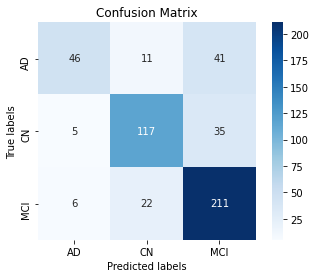

In [10]:
savepath = 'models'
lr=0.000001
if not os.path.isdir(savepath):
      os.makedirs(savepath)
csvloger_callback = tf.keras.callbacks.CSVLogger(f'{savepath}history.csv', separator=',', append=False)

modelcheckpoint_callback = tf.keras.callbacks.ModelCheckpoint(savepath+'inceptionv3_row_10E-5_weights-epoch:{epoch:03d}-val_Accuracy:{val_Accuracy:.4f}.h5',monitor='val_Accuracy'
    ,verbose=0,save_best_only=True,save_weights_only=True,mode='max',save_freq='epoch' , initial_value_threshold=0.85)

OPT = tf.keras.optimizers.Adam(learning_rate=lr)
model01 = inceptionv3_row(OPT, LOOS,METRICS,image_Shape)
history01 = model01.fit(training_image_datagen, epochs=EPOCH, validation_data=testing_image_datagen,callbacks=[csvloger_callback,modelcheckpoint_callback])
model01 = inceptionv3_row(OPT, LOOS,METRICS,image_Shape)
model01.load_weights(glob.glob(f"{savepath}inceptionv3_row_10E-5_weights-epoch:*-val_Accuracy:{max(history01.history['val_Accuracy']):.4f}.h5")[0])
model01.save(f"{savepath}/inception_50_0.000001.h5")
p1 = model01.predict(testing_image_datagen)
predicted_lab = p1.argmax(axis=-1)
true_lab = testing_image_datagen.classes
plot_confusion_matrix(true_lab, predicted_lab, testing_image_datagen.class_indices.keys(),savepath)
report = classification_report(true_lab, predicted_lab, target_names=testing_image_datagen.class_indices.keys())
print(report)
dump_text(report,f'{savepath}classification_report.txt')
np.save("inception_50_0.000001.npy",p1 )

Epoch 1/50
476/476 [==============================] - 58s 110ms/step - loss: 17.8455 - Accuracy: 0.5803 - AD_Precision: 0.4165 - CN_Precision: 0.5333 - MCI_Precision: 0.6468 - AD_Recall: 0.3153 - CN_Recall: 0.4577 - MCI_Recall: 0.7031 - val_loss: 1.1082 - val_Accuracy: 0.5364 - val_AD_Precision: 0.0000e+00 - val_CN_Precision: 0.8421 - val_MCI_Precision: 0.5415 - val_AD_Recall: 0.0000e+00 - val_CN_Recall: 0.2038 - val_MCI_Recall: 0.7908
Epoch 2/50
476/476 [==============================] - 52s 109ms/step - loss: 0.9272 - Accuracy: 0.5624 - AD_Precision: 0.4479 - CN_Precision: 0.5800 - MCI_Precision: 0.6219 - AD_Recall: 0.1857 - CN_Recall: 0.2828 - MCI_Recall: 0.6900 - val_loss: 1.1807 - val_Accuracy: 0.5405 - val_AD_Precision: 0.6667 - val_CN_Precision: 0.8750 - val_MCI_Precision: 0.5556 - val_AD_Recall: 0.1633 - val_CN_Recall: 0.1338 - val_MCI_Recall: 0.8577
Epoch 3/50
476/476 [==============================] - 52s 109ms/step - loss: 0.7714 - Accuracy: 0.6724 - AD_Precision: 0.5998 - C

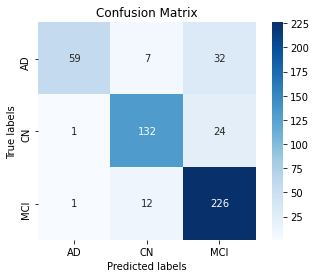

In [11]:
savepath = 'models'
lr=0.0001
if not os.path.isdir(savepath):
      os.makedirs(savepath)
csvloger_callback = tf.keras.callbacks.CSVLogger(f'{savepath}history.csv', separator=',', append=False)

modelcheckpoint_callback = tf.keras.callbacks.ModelCheckpoint(savepath+'inceptionv3_row_10E-5_weights-epoch:{epoch:03d}-val_Accuracy:{val_Accuracy:.4f}.h5',monitor='val_Accuracy'
    ,verbose=0,save_best_only=True,save_weights_only=True,mode='max',save_freq='epoch' , initial_value_threshold=0.85)

OPT = tf.keras.optimizers.Adam(learning_rate=lr)
model02 = inceptionv3_row(OPT, LOOS,METRICS,image_Shape)
history02 = model02.fit(training_image_datagen, epochs=EPOCH, validation_data=testing_image_datagen,callbacks=[csvloger_callback,modelcheckpoint_callback])
model02 = inceptionv3_row(OPT, LOOS,METRICS,image_Shape)
model02.load_weights(glob.glob(f"{savepath}inceptionv3_row_10E-5_weights-epoch:*-val_Accuracy:{max(history02.history['val_Accuracy']):.4f}.h5")[0])
model02.save(f"{savepath}/inception_50_0.0001.h5")
p2 = model02.predict(testing_image_datagen)
predicted_lab = p2.argmax(axis=-1)
true_lab = testing_image_datagen.classes
plot_confusion_matrix(true_lab, predicted_lab, testing_image_datagen.class_indices.keys(),savepath)
report = classification_report(true_lab, predicted_lab, target_names=testing_image_datagen.class_indices.keys())
print(report)
dump_text(report,f'{savepath}classification_report.txt')
np.save("inception_50_0.0001.npy",p2 )

Epoch 1/100
476/476 [==============================] - 60s 114ms/step - loss: 8.8611 - Accuracy: 0.6084 - AD_Precision: 0.5100 - CN_Precision: 0.5534 - MCI_Precision: 0.6736 - AD_Recall: 0.4013 - CN_Recall: 0.5308 - MCI_Recall: 0.6963 - val_loss: 1.1436 - val_Accuracy: 0.4858 - val_AD_Precision: 0.0000e+00 - val_CN_Precision: 0.7143 - val_MCI_Precision: 0.4855 - val_AD_Recall: 0.0000e+00 - val_CN_Recall: 0.0318 - val_MCI_Recall: 0.9833
Epoch 2/100
476/476 [==============================] - 52s 109ms/step - loss: 0.9312 - Accuracy: 0.6123 - AD_Precision: 0.6476 - CN_Precision: 0.5399 - MCI_Precision: 0.6396 - AD_Recall: 0.2036 - CN_Recall: 0.2984 - MCI_Recall: 0.7441 - val_loss: 1.1124 - val_Accuracy: 0.4028 - val_AD_Precision: 0.3176 - val_CN_Precision: 0.6696 - val_MCI_Precision: 0.2500 - val_AD_Recall: 0.7551 - val_CN_Recall: 0.4777 - val_MCI_Recall: 0.0042
Epoch 3/100
476/476 [==============================] - 52s 109ms/step - loss: 0.8163 - Accuracy: 0.6492 - AD_Precision: 0.6066 -

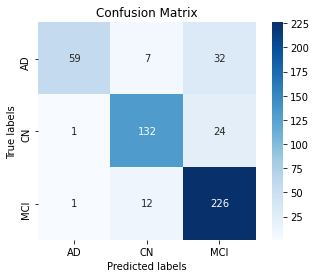

In [12]:
EPOCH = 100
savepath = 'models'
lr=0.0001
if not os.path.isdir(savepath):
      os.makedirs(savepath)
csvloger_callback = tf.keras.callbacks.CSVLogger(f'{savepath}history.csv', separator=',', append=False)

modelcheckpoint_callback = tf.keras.callbacks.ModelCheckpoint(savepath+'inceptionv3_row_10E-5_weights-epoch:{epoch:03d}-val_Accuracy:{val_Accuracy:.4f}.h5',monitor='val_Accuracy'
    ,verbose=0,save_best_only=True,save_weights_only=True,mode='max',save_freq='epoch' , initial_value_threshold=0.85)

OPT = tf.keras.optimizers.Adam(learning_rate=lr)
model03 = inceptionv3_row(OPT, LOOS,METRICS,image_Shape)
history03 = model03.fit(training_image_datagen, epochs=EPOCH, validation_data=testing_image_datagen,callbacks=[csvloger_callback,modelcheckpoint_callback])
model03 = inceptionv3_row(OPT, LOOS,METRICS,image_Shape)
model03.load_weights(glob.glob(f"{savepath}inceptionv3_row_10E-5_weights-epoch:*-val_Accuracy:{max(history03.history['val_Accuracy']):.4f}.h5")[0])
model03.save(f"{savepath}/inception_100_0.0001.h5")
p3 = model02.predict(testing_image_datagen)
predicted_lab = p3.argmax(axis=-1)
true_lab = testing_image_datagen.classes
plot_confusion_matrix(true_lab, predicted_lab, testing_image_datagen.class_indices.keys(),savepath)
report = classification_report(true_lab, predicted_lab, target_names=testing_image_datagen.class_indices.keys())
print(report)
dump_text(report,f'{savepath}classification_report.txt')
np.save("inception_100_0.0001.npy",p3 )

In [9]:
EPOCH = 60
savepath = 'models'
lr=0.0001
if not os.path.isdir(savepath):
      os.makedirs(savepath)
csvloger_callback = tf.keras.callbacks.CSVLogger(f'{savepath}history.csv', separator=',', append=False)

modelcheckpoint_callback = tf.keras.callbacks.ModelCheckpoint(savepath+'inceptionv3_row_10E-5_weights-epoch:{epoch:03d}-val_Accuracy:{val_Accuracy:.4f}.h5',monitor='val_Accuracy'
    ,verbose=0,save_best_only=True,save_weights_only=True,mode='max',save_freq='epoch' , initial_value_threshold=0.85)

OPT = tf.keras.optimizers.RMSprop(learning_rate=lr)
model03 = inceptionv3_row(OPT, LOOS,METRICS,image_Shape)
history03 = model03.fit(training_image_datagen, epochs=EPOCH, validation_data=testing_image_datagen,callbacks=[csvloger_callback,modelcheckpoint_callback])
model03 = inceptionv3_row(OPT, LOOS,METRICS,image_Shape)
model03.load_weights(glob.glob(f"{savepath}inceptionv3_row_10E-5_weights-epoch:*-val_Accuracy:{max(history03.history['val_Accuracy']):.4f}.h5")[0])
model03.save(f"{savepath}/inception_100_0.0001.h5")
p3 = model02.predict(testing_image_datagen)
predicted_lab = p3.argmax(axis=-1)
true_lab = testing_image_datagen.classes
plot_confusion_matrix(true_lab, predicted_lab, testing_image_datagen.class_indices.keys(),savepath)
report = classification_report(true_lab, predicted_lab, target_names=testing_image_datagen.class_indices.keys())
print(report)
dump_text(report,f'{savepath}classification_report.txt')
np.save("inception_100_0.0001.npy",p3 )

Epoch 1/60


2024-02-24 15:07:23.725221: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201


476/476 [==============================] - 76s 126ms/step - loss: 4.2763 - Accuracy: 0.4719 - AD_Precision: 0.1944 - CN_Precision: 0.2757 - MCI_Precision: 0.5462 - AD_Recall: 0.0633 - CN_Recall: 0.1146 - MCI_Recall: 0.5607 - val_loss: 2.1162 - val_Accuracy: 0.4372 - val_AD_Precision: 0.0000e+00 - val_CN_Precision: 0.2636 - val_MCI_Precision: 0.4843 - val_AD_Recall: 0.0000e+00 - val_CN_Recall: 0.1847 - val_MCI_Recall: 0.7741
Epoch 2/60
476/476 [==============================] - 58s 122ms/step - loss: 1.0474 - Accuracy: 0.5192 - AD_Precision: 0.1429 - CN_Precision: 0.2812 - MCI_Precision: 0.5815 - AD_Recall: 0.0060 - CN_Recall: 0.0350 - MCI_Recall: 0.5655 - val_loss: 2.3176 - val_Accuracy: 0.4838 - val_AD_Precision: 0.0000e+00 - val_CN_Precision: 0.0000e+00 - val_MCI_Precision: 0.4838 - val_AD_Recall: 0.0000e+00 - val_CN_Recall: 0.0000e+00 - val_MCI_Recall: 1.0000
Epoch 3/60
476/476 [==============================] - 57s 119ms/step - loss: 0.9774 - Accuracy: 0.5518 - AD_Precision: 0.3276

NameError: name 'model02' is not defined

              precision    recall  f1-score   support

          AD       0.87      0.77      0.82        98
          CN       0.86      0.86      0.86       157
         MCI       0.85      0.90      0.87       239

    accuracy                           0.86       494
   macro avg       0.86      0.84      0.85       494
weighted avg       0.86      0.86      0.86       494



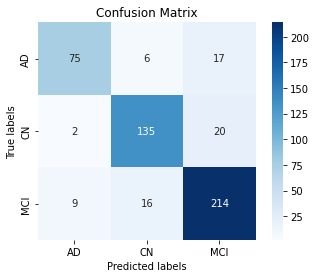

In [10]:
p3 = model03.predict(testing_image_datagen)
predicted_lab = p3.argmax(axis=-1)
true_lab = testing_image_datagen.classes
plot_confusion_matrix(true_lab, predicted_lab, testing_image_datagen.class_indices.keys(),savepath)
report = classification_report(true_lab, predicted_lab, target_names=testing_image_datagen.class_indices.keys())
print(report)
dump_text(report,f'{savepath}classification_report.txt')
np.save("inception_60_0.0001.npy",p3 )

Epoch 1/70


2024-04-13 15:50:15.425098: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201


476/476 [==============================] - 73s 132ms/step - loss: 4.1399 - Accuracy: 0.4645 - AD_Precision: 0.2324 - CN_Precision: 0.3238 - MCI_Precision: 0.5748 - AD_Recall: 0.1687 - CN_Recall: 0.2194 - MCI_Recall: 0.6053 - val_loss: 0.9912 - val_Accuracy: 0.5335 - val_AD_Precision: 0.5714 - val_CN_Precision: 0.6000 - val_MCI_Precision: 0.5687 - val_AD_Recall: 0.1319 - val_CN_Recall: 0.0405 - val_MCI_Recall: 0.8828
Epoch 2/70
476/476 [==============================] - 59s 125ms/step - loss: 0.9324 - Accuracy: 0.5865 - AD_Precision: 0.5391 - CN_Precision: 0.5436 - MCI_Precision: 0.6352 - AD_Recall: 0.2078 - CN_Recall: 0.2544 - MCI_Recall: 0.7087 - val_loss: 1.0096 - val_Accuracy: 0.5795 - val_AD_Precision: 0.4167 - val_CN_Precision: 0.7273 - val_MCI_Precision: 0.6411 - val_AD_Recall: 0.1099 - val_CN_Recall: 0.3243 - val_MCI_Recall: 0.7699
Epoch 3/70
476/476 [==============================] - 59s 125ms/step - loss: 0.7984 - Accuracy: 0.6581 - AD_Precision: 0.6633 - CN_Precision: 0.6119 

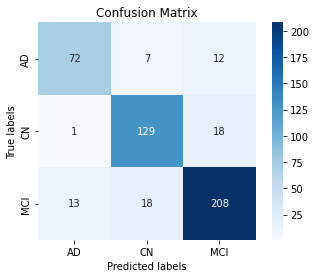

In [10]:
savepath = 'Finetuning/Inception v3/Inception v3_100_0.0001'
lr=0.0001
if not os.path.isdir(savepath):
      os.makedirs(savepath)
csvloger_callback = tf.keras.callbacks.CSVLogger(f'{savepath}history.csv', separator=',', append=False)

modelcheckpoint_callback = tf.keras.callbacks.ModelCheckpoint(savepath+'inceptionv3_row_10E-5_weights-epoch:{epoch:03d}-val_Accuracy:{val_Accuracy:.4f}.h5',monitor='val_Accuracy'
    ,verbose=0,save_best_only=True,save_weights_only=True,mode='max',save_freq='epoch' , initial_value_threshold=0.85)

OPT = tf.keras.optimizers.Adam(learning_rate=lr)
model02 = inceptionv3_row(OPT, LOOS,METRICS,image_Shape)
history02 = model02.fit(training_image_datagen, epochs=EPOCH, validation_data=testing_image_datagen,callbacks=[csvloger_callback,modelcheckpoint_callback])
model02 = inceptionv3_row(OPT, LOOS,METRICS,image_Shape)
model02.load_weights(glob.glob(f"{savepath}inceptionv3_row_10E-5_weights-epoch:*-val_Accuracy:{max(history02.history['val_Accuracy']):.4f}.h5")[0])
model02.save(f"{savepath}/inception_50_0.0001.h5")
p2 = model02.predict(testing_image_datagen)
predicted_lab = p2.argmax(axis=-1)
true_lab = testing_image_datagen.classes
plot_confusion_matrix(true_lab, predicted_lab, testing_image_datagen.class_indices.keys(),savepath)
report = classification_report(true_lab, predicted_lab, target_names=testing_image_datagen.class_indices.keys())
print(report)
dump_text(report,f'{savepath}classification_report.txt')
np.save("inception_50_0.0001.npy",p2 )